<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 0.0 Reset memory when repeating experiment
%reset -f

In [7]:
# 0.1 Print output of mulitple commands in a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Call libraries
Install software and call libraries

In [8]:
# 1.0 Install libraries
!pip install catboost -q
!pip install category_encoders -q

In [122]:
#1.1  Data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#1.2 Split data into X_train/X_test
from sklearn.model_selection import train_test_split

#1.3 For cross-validation and stratified k-fold partitions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#1.4 Encoders
import category_encoders as ce

#1.5 For plotting
import matplotlib.pyplot as plt
import seaborn as sns

#1.6 Classifiers
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

#1.7 Hyperparameter search
from sklearn.model_selection import RandomizedSearchCV

#1.8 Classification reports
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [10]:
#1.8 Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Connect to google drive
And read/examine data

In [11]:
# 2.0 Mount my google drive at /gdrive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Read and examine data

In [12]:
# 2.1 Read data from google drive
df=pd.read_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/airways_mod_ver4.csv')
df.head()
df.describe()
df.info()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


,age,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,43.498000,163.035000,0.206000,0.104000,0.259000,0.173347,23.895350,16.935400,8.101800,1.9100,0.010000,1.826000
std,11.742823,11.470804,0.491738,0.305413,0.440583,0.378737,3.869877,1.592276,0.919566,0.6902,0.099549,0.714307
min,20.000000,132.000000,0.000000,0.000000,0.000000,0.000000,13.800000,12.500000,5.600000,1.0000,0.000000,1.000000
25%,34.000000,155.000000,0.000000,0.000000,0.000000,0.000000,21.400000,16.000000,7.500000,1.0000,0.000000,1.000000
50%,45.000000,163.000000,0.000000,0.000000,0.000000,0.000000,24.000000,17.000000,8.000000,2.0000,0.000000,2.000000
75%,54.000000,171.000000,0.000000,0.000000,1.000000,0.000000,26.525000,18.000000,8.600000,2.0000,0.000000,2.000000
max,64.000000,195.000000,3.000000,1.000000,2.000000,1.000000,37.000000,22.000000,11.000000,4.0000,1.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   sex                      1000 non-null   object 
 2   height                   1000 non-null   int64  
 3   subluxation of mandible  1000 non-null   int64  
 4   head and neck movement   1000 non-null   int64  
 5   buck teeth               1000 non-null   int64  
 6   edentulous               998 non-null    float64
 7   bmi                      1000 non-null   float64
 8   sternomental distance    1000 non-null   float64
 9   thyromental distance     1000 non-null   float64
 10  mallampatti              1000 non-null   int64  
 11  mouth opening            1000 non-null   int64  
 12  cormack lahane           1000 non-null   int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 101.7+ KB


### Streamline column names

In [13]:
#2.2 Remove leading/trailing spaces from col names
df.columns = df.columns.str.strip()
# Within a col name keep single space
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Replaces multiple spaces with a single space
df.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


### Drop NA rows

In [14]:
# 2.3
df.isna().sum()
# We have only two rows where edentulous is null.
df = df.dropna()
# Change the type of 'edentulous' from float64 to int64
df['edentulous'] = df['edentulous'].astype('int64')
df.dtypes

,0
age,0
sex,0
height,0
subluxation of mandible,0
head and neck movement,0
buck teeth,0
edentulous,2
bmi,0
sternomental distance,0
thyromental distance,0


,0
age,int64
sex,object
height,int64
subluxation of mandible,int64
head and neck movement,int64
buck teeth,int64
edentulous,int64
bmi,float64
sternomental distance,float64
thyromental distance,float64


In [15]:
#2.4 Map 'male' and 'female' to 1 and 0

df['sex'].value_counts()

mappings = {
            'female': 0,
            'male': 1
           }

df['sex'] = df['sex'].map(mappings)

df['sex'].value_counts()


,count
sex,
female,533
male,465


,count
sex,
0,533
1,465


In [16]:
#2.5 Our cat features and num features:
#    (Exclude cormack lahane)

cat_features = ['sex', 'buck teeth', 'edentulous', 'mallampatti', 'mouth opening', 'subluxation of mandible', 'head and neck movement']
num_features = ["age", "height", "bmi", "sternomental distance", "thyromental distance"]

In [17]:
#2.6 Number of unique values in our cat features:

df[cat_features].nunique()


,0
sex,2
buck teeth,3
edentulous,2
mallampatti,4
mouth opening,2
subluxation of mandible,4
head and neck movement,2


In [18]:
#2.7 Convert all cat-columns to 'int16' dtype
for col in cat_features:
    df[col] = df[col].astype('int16')

# Display the updated data types
df[cat_features].dtypes


,0
sex,int16
buck teeth,int16
edentulous,int16
mallampatti,int16
mouth opening,int16
subluxation of mandible,int16
head and neck movement,int16


In [19]:
#2.8 Distribution of target values
# Are classes balanced?
# (1 is mapped to 0, 2 to 1, 3 to 2 and 4 to 3:)

df['cormack lahane'].value_counts()

,count
cormack lahane,
2,557
1,324
3,84
4,33


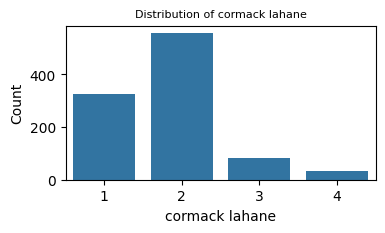

In [20]:
#2.9 Distribution of categories in cormack lahane:
_=plt.figure(figsize=(4, 2))
_=sns.countplot(x='cormack lahane', data=df)
_=plt.title('Distribution of cormack lahane', fontsize = 8)
_=plt.xlabel('cormack lahane')
_=plt.ylabel('Count')
_=plt.show()

## Feature engineering
(Experimental)

In [ ]:
encoder = ce.CatBoostEncoder(cols=["sex", "edentulous", "mouth opening", "head and neck movement"])
encoder.fit(X, y)
X_catEncoded = encoder.transform(X)

CatBoostEncoder(cols=['sex', 'edentulous', 'mouth opening',
                      'head and neck movement'])

In [ ]:
X_catEncoded.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening
0,22,0.821514,172,1,0.765168,1,0.785503,22.40,17.0,8.6,2,0.815799
1,55,0.829262,143,1,0.765168,1,0.785503,27.45,16.0,7.8,2,0.815799
2,59,0.821514,162,2,1.341197,0,1.016239,24.20,14.3,6.9,3,0.815799
3,48,0.829262,168,1,0.765168,0,0.785503,28.50,15.6,7.2,3,0.815799
4,51,0.829262,154,3,0.765168,0,1.016239,25.30,14.3,6.7,4,1.711423


In [ ]:
df['bmi'].min()
df['bmi'].max()
(df['bmi'].max() - df['bmi'].min())/4


13.8

37.0

5.8

In [ ]:
df['height'].min()
df['height'].max()
(df['height'].max() - df['height'].min())/4


132

195

15.75

In [ ]:
bmi_cat = pd.cut(df["bmi"],
       bins=[13, 19, 25, 31, 38],
       labels=["0", "1", "2", "3"])

In [ ]:
height_cat = pd.cut(df["height"],
       bins=[130, 146, 162, 178, 195],
       labels=["0", "1", "2", "3"])

In [ ]:
bmi_cat = pd.DataFrame(bmi_cat)
bmi_cat.head()

,bmi
0,1
1,2
2,1
3,2
4,2


In [ ]:
height_cat = pd.DataFrame(height_cat)
height_cat.head()

,height
0,2
1,0
2,1
3,2
4,1


In [ ]:
bmi_cat.rename(columns = {'bmi':'bmi_cat'}, inplace = True)
bmi_cat.head()

,bmi_cat
0,1
1,2
2,1
3,2
4,2


In [ ]:
height_cat.rename(columns = {'height':'height_cat'}, inplace = True)
height_cat.head()

,height_cat
0,2
1,0
2,1
3,2
4,1


In [ ]:
df['bmi_cat'] = bmi_cat

In [ ]:
df['height_cat'] = height_cat

In [ ]:
df.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane,bmi_cat,height_cat
0,22,1,172,1,0,1,0.0,22.40,17.0,8.6,2,0,1,1,2
1,55,0,143,1,0,1,0.0,27.45,16.0,7.8,2,0,0,2,0
2,59,1,162,2,1,0,1.0,24.20,14.3,6.9,3,0,2,1,1
3,48,0,168,1,0,0,0.0,28.50,15.6,7.2,3,0,1,2,2
4,51,0,154,3,0,0,1.0,25.30,14.3,6.7,4,1,3,2,1


In [ ]:
dfc = df.copy()
y = dfc.pop('cormack lahane')
X = dfc




## Visulaizing data
And discovering relationships

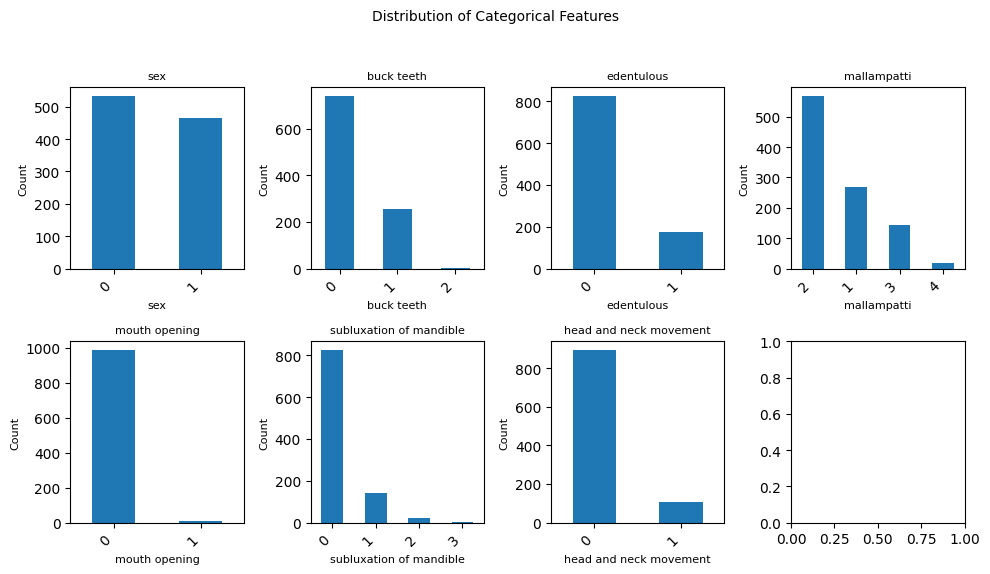

In [ ]:
# prompt: Plot distributions of all features of df_cat in 2 X 4 matrix. Plot graph titles in fontsize of 8 and axis labels also in fontsize of 8. Give overall title as Distribution of Categorical Features

# Assuming df_cat is already defined as in the provided code

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
_=fig.suptitle('Distribution of Categorical Features', fontsize=10)

for i, col in enumerate(cat_features):
    ax = axes[i // 4, i % 4]
    _=df[col].value_counts().plot(kind='bar', ax=ax)
    _=ax.set_title(col, fontsize=8)
    _=ax.set_xlabel(col, fontsize=8)
    _=ax.set_ylabel('Count', fontsize=8)
    _=plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


Observations:     



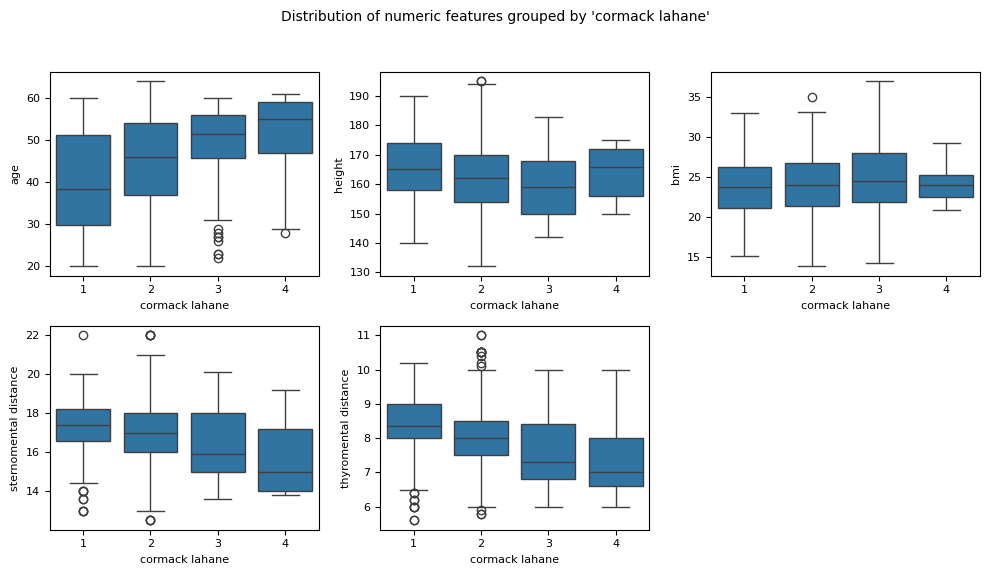

In [ ]:
# prompt: Consider the dataframe df. Draw box plots of all numeric features grouped by 'cormack lahane'. Plot them in a matrix of 2 X 3.. Keep the fontsize of labels to 8. Keep overall title as distribution of numeric features grouped by  'cormack lahane'. Delete the last unused axes


fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle("Distribution of numeric features grouped by 'cormack lahane'", fontsize=10)

for i, col in enumerate(num_features):
    ax = axes[i // 3, i % 3]
    _=sns.boxplot(x='cormack lahane', y=col, data=df, ax=ax)
    _=ax.set_xlabel('cormack lahane', fontsize=8)
    _=ax.set_ylabel(col, fontsize=8)
    _=ax.tick_params(axis='x', labelsize=8)
    _=ax.tick_params(axis='y', labelsize=8)


# Delete the last unused axes if necessary (adjust the index based on the number of numeric features)
if len(df[num_features].columns) < 6:
    for i in range(len(df[num_features].columns), 6):
      _=axes.flatten()[i].set_visible(False)


_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


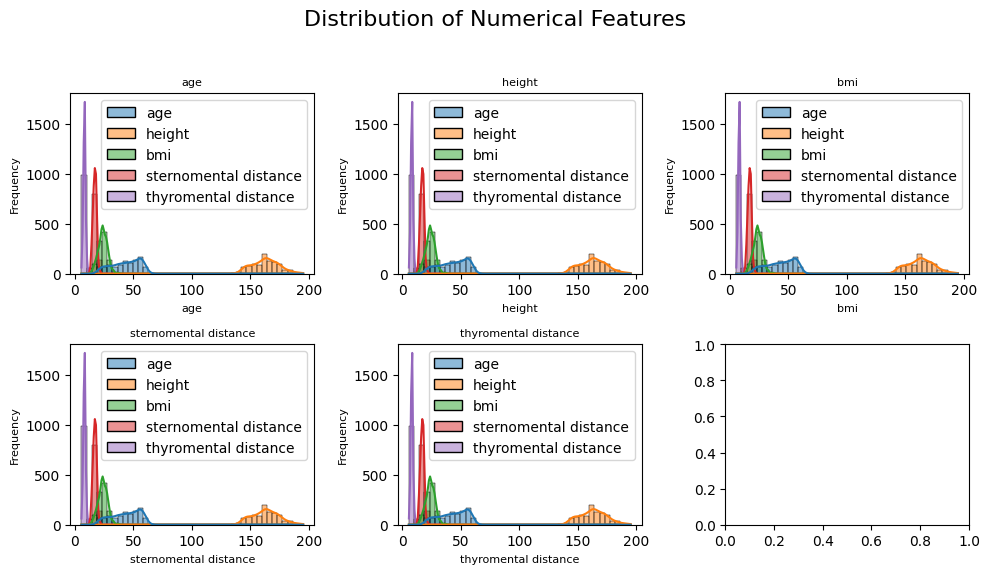

In [ ]:
# prompt: Plot distribution of all features of df_num. But do not show the last  plot ie the sixth with no data ie do not show even its axis

import matplotlib.pyplot as plt
# Assuming df_num is already defined as in the provided code

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, col in enumerate(num_features):
    if i < 5:  # Skip the sixth plot
        ax = axes[i // 3, i % 3]
        _=sns.histplot(df[num_features], ax=ax, kde=True) # Use histplot for better visualization
        _=ax.set_title(col, fontsize=8)
        _=ax.set_xlabel(col, fontsize=8)
        _=ax.set_ylabel('Frequency', fontsize=8)
    elif i==5:
        ax = axes[-1,-1]
        #ax = axes[i // 3, i % 3]
        #ax.axes.set_visible(False)
        ax.axis('off') # Hide the axis of the sixth plot
        ax.axes.flatten()[i].set_visible(False)



_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


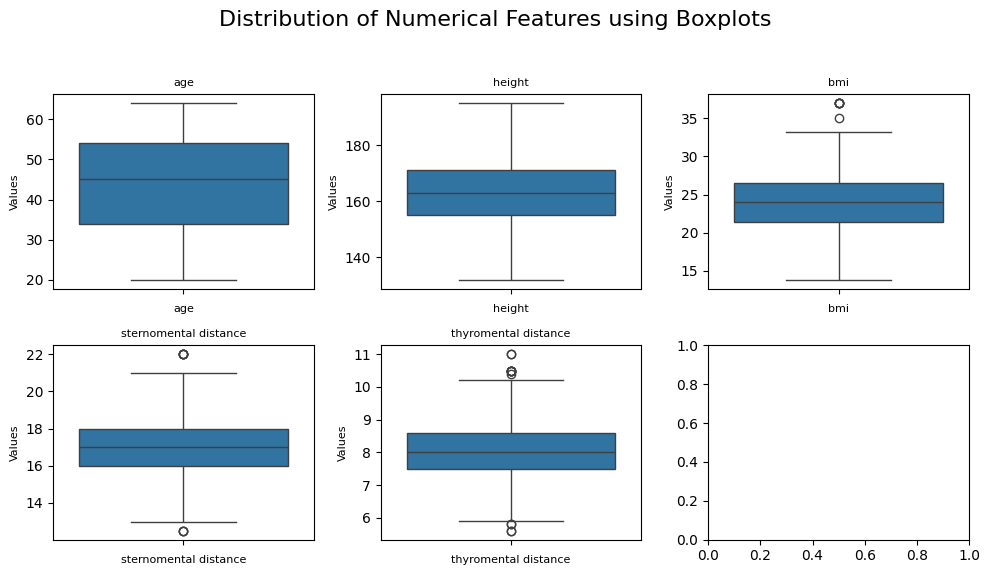

In [ ]:
# prompt: Plot distribution of all features of df_num using boxplots.

## Are there are outliers?

import matplotlib.pyplot as plt
# Assuming df_num is already defined as in the provided code

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle('Distribution of Numerical Features using Boxplots', fontsize=16)

for i, col in enumerate(df_num.columns):
    if i < 5:  # Skip the sixth plot
        ax = axes[i // 3, i % 3]
        _=sns.boxplot(y=df_num[col], ax=ax) # Use boxplot for distribution
        _=ax.set_title(col, fontsize=8)
        _=ax.set_xlabel(col, fontsize=8)
        _=ax.set_ylabel('Values', fontsize=8)
    elif i==5:
        ax = axes[-1,-1]
        ax.axes.set_visible(False)
        ax.axis('off') # Hide the axis of the sixth plot

_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


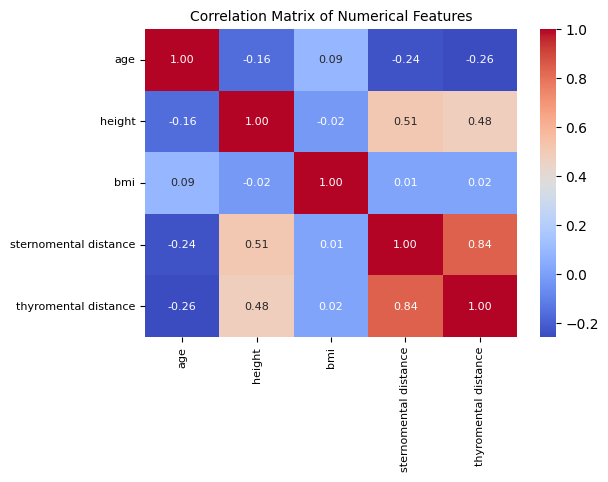

In [ ]:
# prompt: Write a program to visualize the correlation in df_num features and keep fontsize of labels be 8

_=plt.figure(figsize=(6, 4))
_=sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
_=plt.title('Correlation Matrix of Numerical Features', fontsize=10)
_=plt.xticks(fontsize=8)
_=plt.yticks(fontsize=8)
_=plt.show()


<Axes: xlabel='sternomental distance', ylabel='age'>

<Axes: xlabel='sternomental distance', ylabel='age'>

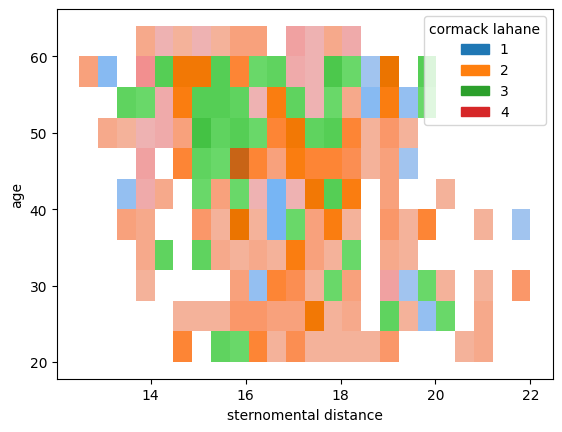

In [ ]:
sns.histplot(df_num, x="sternomental distance", y="age")
sns.histplot(df, x="sternomental distance", y="age", hue = 'cormack lahane')


In [ ]:
sum(df['thyromental distance'].notna() > 60)

0

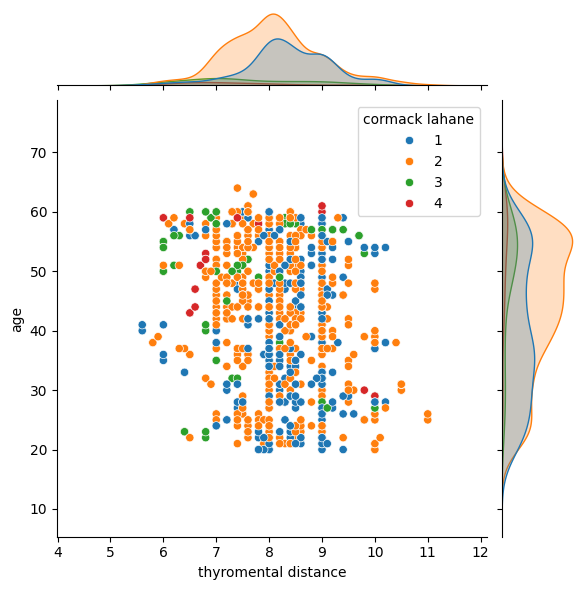

In [ ]:
dx = df[df['thyromental distance'] < 60]
sns.jointplot(data=dx, x="thyromental distance", y="age", hue = 'cormack lahane')

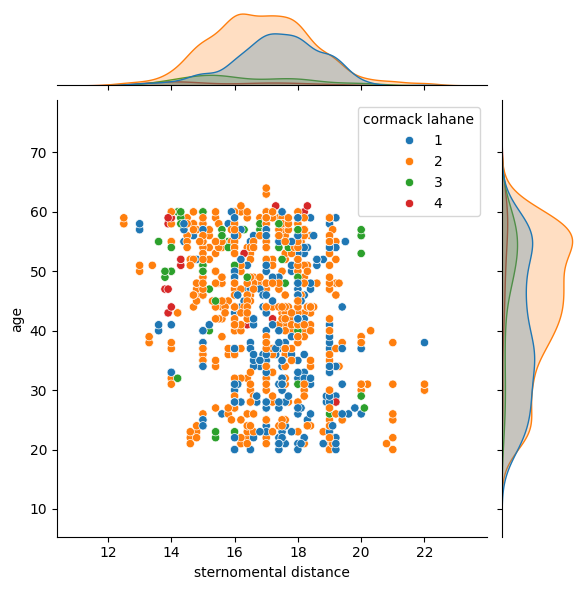

In [ ]:
sns.jointplot(data=df, x="sternomental distance", y="age", hue = 'cormack lahane', palette= "tab10")

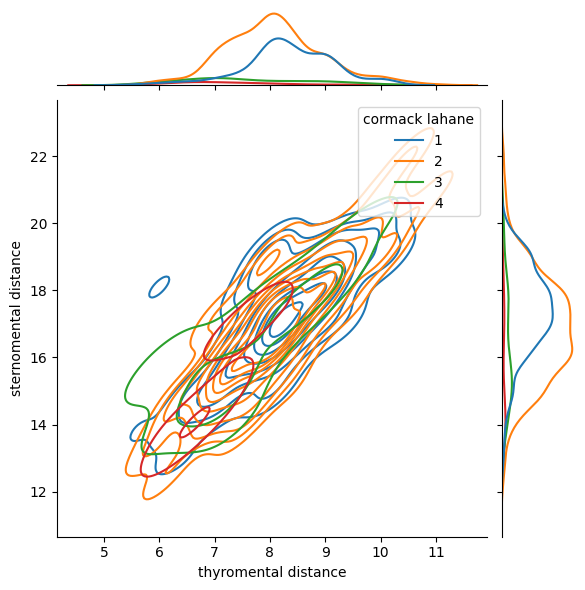

In [ ]:
dx = df[df['thyromental distance'] < 60]
ax = sns.jointplot(data=dx, x="thyromental distance",
              y="sternomental distance",
              hue = 'cormack lahane',
              kind = "kde",
              palette= "tab10")




In [ ]:
"""
# 1.3. Missing Data Treatment--amended

# 1.3.1 Impite Missing Categorical Data [Nominal | Ordinal] using Descriptive Statistics : Central Tendance (Mode)

# Dataset Used : df_cat_mde

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si_cat_transformed = si_cat.fit_transform(df_cat)
df_cat = pd.DataFrame(si_cat_transformed, columns=df_cat.columns)
df_cat.head()
"""

"\n# 1.3. Missing Data Treatment--amended\n\n# 1.3.1 Impite Missing Categorical Data [Nominal | Ordinal] using Descriptive Statistics : Central Tendance (Mode)\n\n# Dataset Used : df_cat_mde\n\nsi_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')\nsi_cat_transformed = si_cat.fit_transform(df_cat)\ndf_cat = pd.DataFrame(si_cat_transformed, columns=df_cat.columns)\ndf_cat.head()\n"

In [ ]:
"""
from sklearn.impute import SimpleImputer

# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency
# Dataset used: df_noncat_mde

# Create a SimpleImputer with the 'most_frequent' strategy
si_noncat = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit and transform the data
si_noncat_transformed = si_noncat.fit_transform(df_noncat)
df_noncat = pd.DataFrame(si_noncat_transformed, columns=df_noncat.columns)
df_noncat.head()
"""

"\nfrom sklearn.impute import SimpleImputer\n\n# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency\n# Dataset used: df_noncat_mde\n\n# Create a SimpleImputer with the 'most_frequent' strategy\nsi_noncat = SimpleImputer(missing_values=np.nan, strategy='median')\n\n# Fit and transform the data\nsi_noncat_transformed = si_noncat.fit_transform(df_noncat)\ndf_noncat = pd.DataFrame(si_noncat_transformed, columns=df_noncat.columns)\ndf_noncat.head()\n"

"age", "height", "bmi", "sternomental distance", "thyromental distance"

In [ ]:
"""
df_ppd = df_noncat.join(df_cat)
df_ppd.head()
df_ppd.to_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/df_ppd.csv', index=False)
df_ppd.shape
df_ppd.info()
"""

"\ndf_ppd = df_noncat.join(df_cat)\ndf_ppd.head()\ndf_ppd.to_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/df_ppd.csv', index=False)\ndf_ppd.shape\ndf_ppd.info()\n"

In [ ]:
"""
No preprocessing to OHE
"""

'\nNo preprocessing to OHE\n'

## Modeling

### Split into X and y

In [99]:
#3.0 We keep a copy of our data
dfc = df.copy()

#3.1 Split dfc into target and predictors
y = dfc.pop('cormack lahane')
X = dfc

### Create dataframes to store results

In [100]:
# Our accuracy dataframe
# We will store 500 accuracy points per model
# Repeated stratifiedKfold(cv=5), 100 times
acc_array = pd.DataFrame(np.array(range(500)), columns = ["sno:"])
roc_array = pd.DataFrame(np.array(range(500)), columns = ["sno:"])

In [101]:
# Label encode cromack lahane

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
print(le.transform([1,2,3,4]))

[1 2 3 4]
[0 1 2 3]


In [125]:
# Split into train/test. We may need it at some places
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 stratify = y,
                                                 test_size = 0.20,
                                                 )

## RandomForest Repeated StratifiedKFold

In [102]:
%%time

# Ref: https://stackoverflow.com/a/66022487

clf =  RandomForestClassifier(criterion='entropy',
                              n_estimators=200)

# To store, class-wise roc-data, for 100 attempts
all_roc_auc = []
# To store accuracy data for 100 attempts
total_acc_list = []
count = 1
# We take 5-random folds 100 times
for i in range(100):
  # To store accuracy data averaged over all classes
  list_accu_stratified = []
  # Class-wise roc-data for each of the classes for five folds
  list_roc_auc = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]  # y is label encoded
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Use X_train, X_test, y_train, y_test to train/evaluate model in each fold
      clf.fit(X_train, y_train)
      # Get overall accuracy
      acc = clf.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      # Get AUC score for each class
      auc = roc_auc_score(y_test,
                          clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc

  total_acc_list.append(list_accu_stratified)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.865
Class-wise AUC: [0.95994302 0.93927557 0.95703125 0.95706884]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.895
Class-wise AUC: [0.95582491 0.95931412 0.97557056 0.99555885]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.89
Class-wise AUC: [0.96205128 0.95419577 0.98569592 0.98149519]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8793969849246231
Class-wise AUC: [0.95556831 0.96017609 0.98577893 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8894472361809045
Class-wise AUC: [0.94385763 0.95183251 0.99838397 1.        ]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test

### AUC (randomforest modeling)

In [117]:
# AUC data compilation (randomforest)
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
# Class-wise mean of AUCs
print("RandomForest--Class-wise mean of AUCs:" ,all_roc_auc_array.mean(axis=0).mean(axis=0))

(100, 5, 4)

RandomForest--Class-wise mean of AUCs: [0.95973503 0.95065699 0.9638093  0.98169294]


In [104]:
# Classwise AUCs in 500 iterations (randomforest)
# Unlist the list
res =  [x for sublist in all_roc_auc for x in sublist]
# Store the resulting output in pandas Dataframe
roc_array['randomforest'] = res
# 'Explode' the list into class-wise columns
classwise_roc = roc_array['randomforest'].apply(pd.Series)
# Rename the columns
classwise_roc.columns = ['class1', 'class2', 'class3', 'class4']
classwise_roc.head()

,class1,class2,class3,class4
0,0.959943,0.939276,0.957031,0.957069
1,0.955825,0.959314,0.975571,0.995559
2,0.962051,0.954196,0.985696,0.981495
3,0.955568,0.960176,0.985779,1.000000
4,0.943858,0.951833,0.998384,1.000000


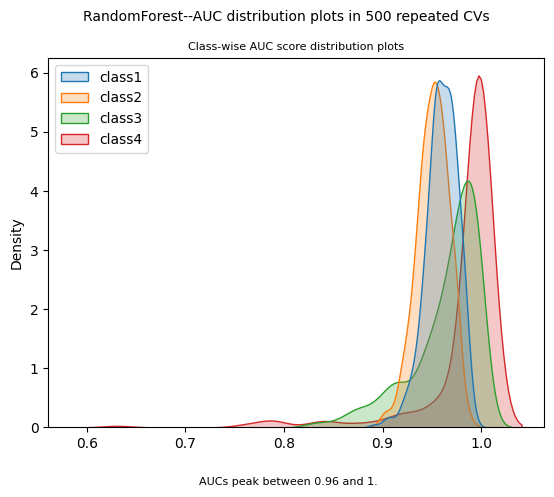

In [109]:
# AUC distribution plots--500 in 500 repeated CVs (randomforest)
_=sns.kdeplot(classwise_roc, fill=True)
_=plt.suptitle("RandomForest--AUC distribution plots in 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Class-wise AUC score distribution plots", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "AUCs peak between 0.96 and 1.",
              ha="center",
              fontsize=8)
_=plt.show()

### Accuracy distribution (randomforest modeling)

In [111]:
print("===randomforest=====")
acc_array['randomforest'] = np.array(total_acc_list).flatten()
print("Overall Accuracy:", np.mean(acc_array['randomforest']))
print("Median Accuracy:", np.median(acc_array['randomforest']))
print("Std deviation of accuracy:", np.std(acc_array['randomforest']))
print("Class-wise avg AUC score :", all_roc_auc_array.mean(axis=0).mean(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

===randomforest=====
Overall Accuracy: 0.881248391959799
Median Accuracy: 0.8844221105527639
Std deviation of accuracy: 0.022966275085343615
Class-wise avg AUC score : [0.95973503 0.95065699 0.9638093  0.98169294]
(for classes 1,2,3,4 respectively)


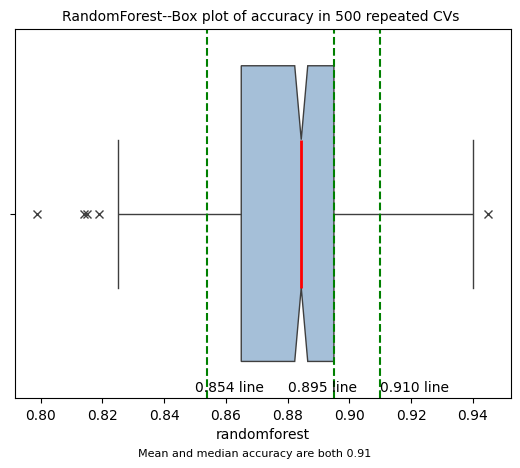

In [116]:
# Accuracy box plot. How accuracy varies over CV trials (randomforest)
_=plt.title("RandomForest--Box plot of accuracy in 500 repeated CVs ", ha="center", fontsize=10)
ax=sns.boxplot(
            data=acc_array, x="randomforest",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )


_=ax.axvline(x=0.854, color='g', linestyle='--')
_=ax.axvline(x=0.91, color='g', linestyle='--')
_=ax.axvline(x=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.88,0.48, "0.895 line")
_=ax.text(0.91,0.48, "0.910 line")
_=ax.text(0.85,0.48, "0.854 line")

_=plt.figtext(0.5, -0.01, "Mean and median accuracy are both 0.91",
              ha="center",
              fontsize=8)
_=plt.show()

### Classification scores (randomforest modeling)

In [113]:
# AUC data compilation (randomforest)
classification_scores = np.array(total_class0)
# Classwise AUCs in 500 iterations
# Unlist the list
res =  [x for sublist in classification_scores for x in sublist]
# Store the resulting output in pandas Dataframe
classification_array=pd.DataFrame()
classification_array['randomforest'] = res
# 'Explode' the list into class-wise columns
classwise_classification_scores = classification_array['randomforest'].apply(pd.Series)
# Rename the columns
classwise_classification_scores.columns = ['precision', 'recall', 'f1-score', 'support']
classwise_classification_scores.head(2)


,precision,recall,f1-score,support
0,0.923077,0.923077,0.923077,65.0
1,0.859375,0.859375,0.859375,64.0


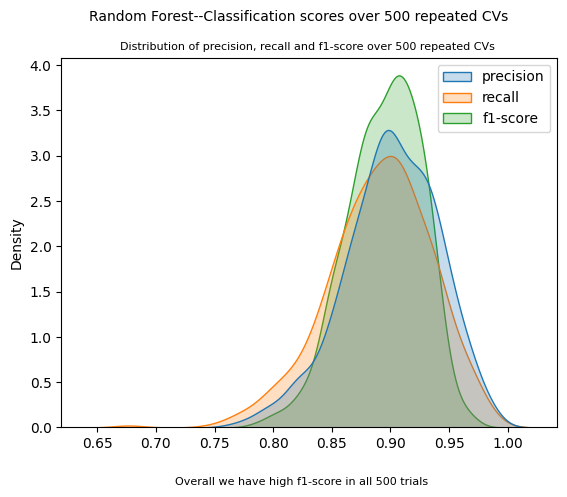

In [115]:
# AUC distribution plots--500 in 500 repeated CVs (randomforest)
_=sns.kdeplot(classwise_classification_scores[["precision", 	"recall", 	"f1-score"]], fill=True)
_=plt.suptitle("Random Forest--Classification scores over 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Distribution of precision, recall and f1-score over 500 repeated CVs ", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "Overall we have high f1-score in all 500 trials",
              ha="center",
              fontsize=8)
_=plt.show()

## Catboost Classifier

In [ ]:


X[cat_features].dtypes
X.shape



,0
sex,int64
buck teeth,int64
edentulous,int64
mallampatti,int64
mouth opening,int64
subluxation of mandible,int64
head and neck movement,int64


(998, 12)

In [ ]:
# Initialize and train the CatBoost Classifier
# Splitting the dataset into test & train

model = CatBoostClassifier(cat_features = cat_features )
model.fit(X_train, y_train)



In [ ]:
# Evaluate and predict
accuracy = model.score(X_test, y_test)
accuracy


np.float64(0.86)

## HistGBClassifier

In [ ]:

#categorical_features = df_cat.columns[:-1]
hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = cat_features,
                                                 learning_rate = 0.1,
                                                 #class_weight = 'balanced'
                                                 ).fit(X_train, y_train)



hist_classifier.score(X_test, y_test)


0.91

In [ ]:
scores = cross_val_score(hist_classifier, X, y, cv=5)
scores
scores.mean()

array([0.935     , 0.905     , 0.905     , 0.88944724, 0.89447236])

np.float64(0.90578391959799)

In [ ]:
from sklearn.inspection import permutation_importance
rh = permutation_importance(hist_classifier, X_test, y_test,
                           n_repeats=30,
                           random_state=0)



In [ ]:
for i in rh.importances_mean.argsort()[::-1]:
    if rh.importances_mean[i] - 2 * rh.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{rh.importances_mean[i]:.3f}"
              f" +/- {rh.importances_std[i]:.3f}")

bmi          0.170 +/- 0.020
mallampatti  0.154 +/- 0.022
height       0.134 +/- 0.015
age          0.108 +/- 0.017
thyromental distance0.107 +/- 0.017
sternomental distance0.085 +/- 0.016
buck teeth   0.031 +/- 0.009
sex          0.026 +/- 0.009
head and neck movement0.021 +/- 0.005


In [ ]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits

import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time

# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = cat_features,
                                                 learning_rate = 0.07,
                                                 #class_weight = 'balanced'
                                                 )

start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


In [142]:
%%time


hist_classifier = HistGradientBoostingClassifier(max_iter=200,
                                                 categorical_features = cat_features)


param_grid = {
              "learning_rate": [0.01, 0.05, 0.1, 0.15],
              "max_leaf_nodes": [7, 10, 15, 20,25,30,35, 40,45],
              "l2_regularization": [0.0007,0.001,0.002,0.003,0.005,0.01, 0.02],
              "max_features" : [0.5,0.6,0.7,0.8,0.9,1]
             }

model_random_search = RandomizedSearchCV(hist_classifier,
                                       param_distributions=param_grid,
                                       n_jobs=-1,
                                       cv=5
                                       )

#model_grid_search = GridSearchCV(hist_classifier, param_grid=param_grid, n_jobs=2, cv=5)
model_random_search.fit(X_train, y_train)
hist_bst_param= model_random_search.best_params_
hist_bst_param


CPU times: user 2.09 s, sys: 182 ms, total: 2.27 s
Wall time: 45.2 s


{'max_leaf_nodes': 45,
 'max_features': 0.6,
 'learning_rate': 0.15,
 'l2_regularization': 0.005}

In [144]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits


# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )

start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))
    auc = roc_auc_score(y_test,
                          hist_classifier.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
    print("Class-wise AUC:", auc)

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.895
Class-wise AUC: [0.97253561 0.96174919 0.95618207 0.99925981]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.92
Class-wise AUC: [0.97598805 0.96986607 0.99324976 0.98593634]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.915
Class-wise AUC: [0.95737892 0.95171576 0.92671167 0.99185788]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9095477386934674
Class-wise AUC: [0.92847302 0.94113432 0.98319328 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8743718592964824
Class-wise AUC: [0.93295063 0.93273956 0.88590821 1.        ]
Overall Accuracy: 0.9027839195979901
CPU times: user 16 s, sys: 503 ms, total: 16.5 s

In [145]:
%%time

# Ref: https://stackoverflow.com/a/66022487

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )


total_class0 = []
total_class1 = []
total_class2 = []
total_class3 = []
# To store, class-wise roc-data, for 100 attempts
all_roc_auc = []
# To store accuracy data for 100 attempts
total_acc_list = []
count = 1
# We take 5-random folds 100 times
for i in range(100):
  # To store accuracy data averaged over all classes
  list_accu_stratified = []
  # Class-wise roc-data for each of the classes for five folds
  list_roc_auc = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]  # y is label encoded
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Use X_train, X_test, y_train, y_test to train/evaluate model in each fold
      hist_classifier.fit(X_train, y_train)
      # Get overall accuracy
      acc = hist_classifier.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      # Get AUC score for each class
      auc = roc_auc_score(y_test,
                          hist_classifier.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc
      sk = classification_report(y_test, hist_classifier.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
Class-wise AUC: [0.96319088 0.96377841 0.94904891 0.99407846]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.905
Class-wise AUC: [0.97357537 0.96661932 0.9791064  0.99111769]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.86
Class-wise AUC: [0.94717949 0.93364713 0.94728383 1.        ]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9195979899497487
Class-wise AUC: [0.92743972 0.93447993 0.98513251 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9095477386934674
Class-wise AUC: [0.94362801 0.93540131 0.87653523 0.99740933]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test s

In [154]:
# AUC data compilation (extratrees)
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
# Class-wise mean of AUCs
print("HistClassifier--Class-wise mean of AUCs:" ,all_roc_auc_array.mean(axis=0).mean(axis=0))

(100, 5, 4)

HistClassifier--Class-wise mean of AUCs: [0.95440747 0.94453817 0.95162512 0.97630743]


In [155]:
# Classwise AUCs in 500 iterations (extratrees)
# Unlist the list
res =  [x for sublist in all_roc_auc for x in sublist]
# Store the resulting output in pandas Dataframe
roc_array['histclassifier'] = res
# 'Explode' the list into class-wise columns
classwise_roc = roc_array['histclassifier'].apply(pd.Series)
# Rename the columns
classwise_roc.columns = ['class1', 'class2', 'class3', 'class4']
classwise_roc.head()

,class1,class2,class3,class4
0,0.963191,0.963778,0.949049,0.994078
1,0.973575,0.966619,0.979106,0.991118
2,0.947179,0.933647,0.947284,1.000000
3,0.927440,0.934480,0.985133,1.000000
4,0.943628,0.935401,0.876535,0.997409


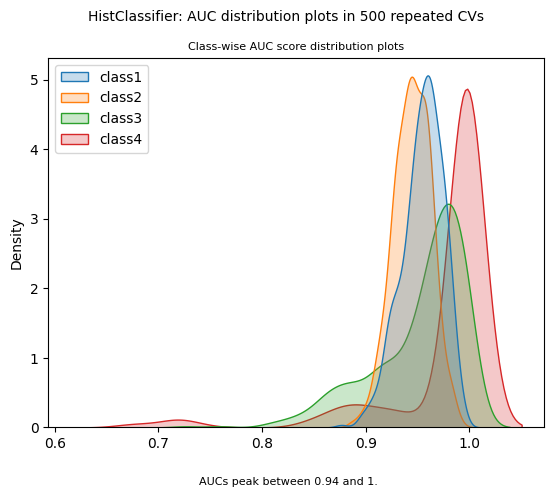

In [156]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees)
_=sns.kdeplot(classwise_roc, fill=True)
_=plt.suptitle("HistClassifier: AUC distribution plots in 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Class-wise AUC score distribution plots", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "AUCs peak between 0.94 and 1.",
              ha="center",
              fontsize=8)
_=plt.show()

In [157]:
# Mean accuracy scores over CV trials (extratrees)
print("===HistClassifier=====")
acc_array['histclassifier'] = np.array(total_acc_list).flatten()
print("Mean Accuracy:", np.mean(acc_array['histclassifier']))
print("Median Accuracy:", np.median(acc_array['histclassifier']))
print("Std deviation of accuracy:", np.std(acc_array['histclassifier']))
print("Class-wise avg AUC scores :", all_roc_auc_array.mean(axis=0).mean(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

===HistClassifier=====
Mean Accuracy: 0.8893806532663318
Median Accuracy: 0.8897236180904522
Std deviation of accuracy: 0.024530248928303494
Class-wise avg AUC scores : [0.95440747 0.94453817 0.95162512 0.97630743]
(for classes 1,2,3,4 respectively)


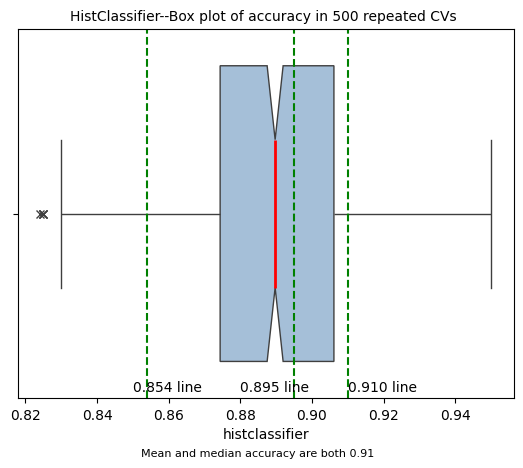

In [158]:
# Accuracy box plot. How accuracy varies over CV trials (extratrees)
_=plt.title("HistClassifier--Box plot of accuracy in 500 repeated CVs ", ha="center", fontsize=10)
ax=sns.boxplot(
            data=acc_array, x="histclassifier",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )


_=ax.axvline(x=0.854, color='g', linestyle='--')
_=ax.axvline(x=0.91, color='g', linestyle='--')
_=ax.axvline(x=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.88,0.48, "0.895 line")
_=ax.text(0.91,0.48, "0.910 line")
_=ax.text(0.85,0.48, "0.854 line")

_=plt.figtext(0.5, -0.01, "Mean and median accuracy are both 0.91",
              ha="center",
              fontsize=8)
_=plt.show()

In [159]:
# AUC data compilation (extratrees)
classification_scores = np.array(total_class0)
# Classwise AUCs in 500 iterations
# Unlist the list
res =  [x for sublist in classification_scores for x in sublist]
# Store the resulting output in pandas Dataframe
classification_array=pd.DataFrame()
classification_array['histclassifier'] = res
# 'Explode' the list into class-wise columns
classwise_classification_scores = classification_array['histclassifier'].apply(pd.Series)
# Rename the columns
classwise_classification_scores.columns = ['precision', 'recall', 'f1-score', 'support']
classwise_classification_scores.head(2)


,precision,recall,f1-score,support
0,0.863636,0.876923,0.870229,65.0
1,0.916667,0.859375,0.887097,64.0


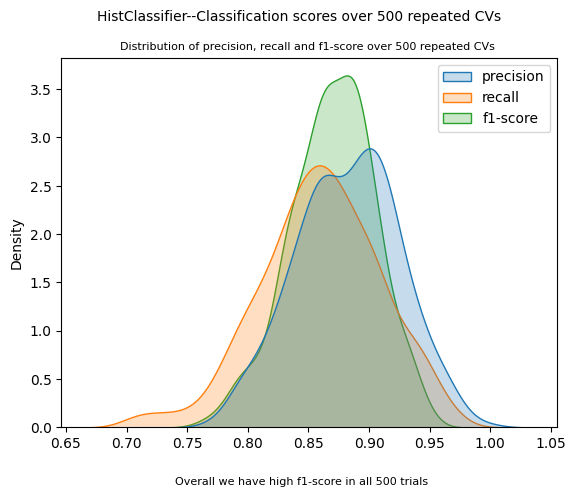

In [160]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees)
_=sns.kdeplot(classwise_classification_scores[["precision", 	"recall", 	"f1-score"]], fill=True)
_=plt.suptitle("HistClassifier--Classification scores over 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Distribution of precision, recall and f1-score over 500 repeated CVs ", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "Overall we have high f1-score in all 500 trials",
              ha="center",
              fontsize=8)
_=plt.show()

## ExtraTrees

### Repeated StratifiedKFold

In [92]:
%%time

# Ref: https://stackoverflow.com/a/66022487

clf = ExtraTreesClassifier(criterion="entropy",
                           n_estimators=400,
                           max_depth=None,
                           min_samples_split=2,
                           )


total_class0 = []
total_class1 = []
total_class2 = []
total_class3 = []
# To store, class-wise roc-data, for 100 attempts
all_roc_auc = []
# To store accuracy data for 100 attempts
total_acc_list = []
count = 1
# We take 5-random folds 100 times
for i in range(100):
  # To store accuracy data averaged over all classes
  list_accu_stratified = []
  # Class-wise roc-data for each of the classes for five folds
  list_roc_auc = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]  # y is label encoded
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Use X_train, X_test, y_train, y_test to train/evaluate model in each fold
      clf.fit(X_train, y_train)
      # Get overall accuracy
      acc = clf.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      # Get AUC score for each class
      auc = roc_auc_score(y_test,
                          clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.94
Class-wise AUC: [0.97458689 0.97296063 0.97639266 1.        ]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.88
Class-wise AUC: [0.92164522 0.94881291 0.96432015 1.        ]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.915
Class-wise AUC: [0.97105413 0.96178763 0.98023144 0.98667654]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8743718592964824
Class-wise AUC: [0.9554535  0.94072482 0.97026503 0.8462867 ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8994974874371859
Class-wise AUC: [0.97003444 0.96601147 0.99111183 1.        ]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test 

In [93]:
# AUC data compilation (extratrees)
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
# Class-wise mean of AUCs
print("ExtraTrees--Class-wise mean of AUCs:" ,all_roc_auc_array.mean(axis=0).mean(axis=0))

(100, 5, 4)

Class-wise mean of AUCs: [0.96839967 0.96177206 0.97474791 0.98796176]


In [94]:
# Classwise AUCs in 500 iterations (extratrees)
# Unlist the list
res =  [x for sublist in all_roc_auc for x in sublist]
# Store the resulting output in pandas Dataframe
roc_array['extratrees'] = res
# 'Explode' the list into class-wise columns
classwise_roc = roc_array['extratrees'].apply(pd.Series)
# Rename the columns
classwise_roc.columns = ['class1', 'class2', 'class3', 'class4']
classwise_roc.head()

,class1,class2,class3,class4
0,0.974587,0.972961,0.976393,1.000000
1,0.921645,0.948813,0.964320,1.000000
2,0.971054,0.961788,0.980231,0.986677
3,0.955454,0.940725,0.970265,0.846287
4,0.970034,0.966011,0.991112,1.000000


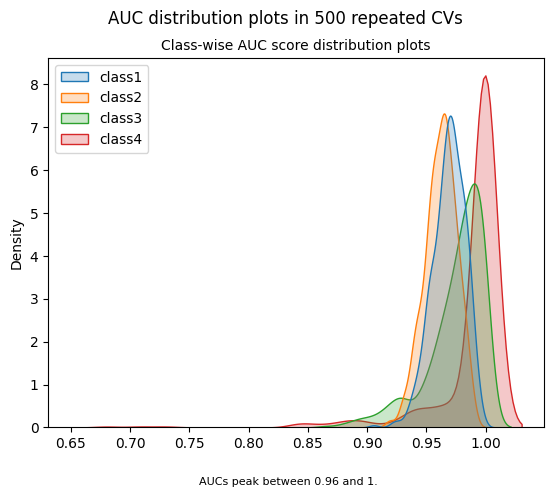

In [95]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees)
_=sns.kdeplot(classwise_roc, fill=True)
_=plt.suptitle("ExtraTrees: AUC distribution plots in 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Class-wise AUC score distribution plots", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "AUCs peak between 0.96 and 1.",
              ha="center",
              fontsize=8)
_=plt.show()

In [96]:
# Mean accuracy scores over CV trials (extratrees)
print("===ExtraTrees=====")
acc_array['extratrees'] = np.array(total_acc_list).flatten()
print("Mean Accuracy:", np.mean(acc_array['extratrees']))
print("Median Accuracy:", np.median(acc_array['extratrees']))
print("Std deviation of accuracy:", np.std(acc_array['extratrees']))
print("Class-wise avg AUC scores :", all_roc_auc_array.mean(axis=0).mean(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

Mean Accuracy: 0.9089074371859297
Median Accuracy: 0.91
Std deviation of accuracy: 0.022591650800277273
Class-wise avg AUC scores : [0.96839967 0.96177206 0.97474791 0.98796176]
(for classes 1,2,3,4 respectively)


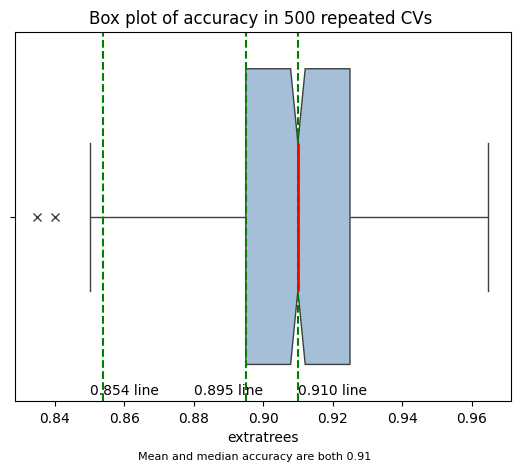

In [82]:
# Accuracy box plot. How accuracy varies over CV trials (extratrees)
_=plt.title("ExtraTrees--Box plot of accuracy in 500 repeated CVs ", ha="center", fontsize=10)
ax=sns.boxplot(
            data=acc_array, x="extratrees",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )


_=ax.axvline(x=0.854, color='g', linestyle='--')
_=ax.axvline(x=0.91, color='g', linestyle='--')
_=ax.axvline(x=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.88,0.48, "0.895 line")
_=ax.text(0.91,0.48, "0.910 line")
_=ax.text(0.85,0.48, "0.854 line")

_=plt.figtext(0.5, -0.01, "Mean and median accuracy are both 0.91",
              ha="center",
              fontsize=8)
_=plt.show()

In [83]:
# AUC data compilation (extratrees)
classification_scores = np.array(total_class0)
# Classwise AUCs in 500 iterations
# Unlist the list
res =  [x for sublist in classification_scores for x in sublist]
# Store the resulting output in pandas Dataframe
classification_array=pd.DataFrame()
classification_array['extratrees'] = res
# 'Explode' the list into class-wise columns
classwise_classification_scores = classification_array['extratrees'].apply(pd.Series)
# Rename the columns
classwise_classification_scores.columns = ['precision', 'recall', 'f1-score', 'support']
classwise_classification_scores.head(2)


,precision,recall,f1-score,support
0,0.936508,0.907692,0.921875,65.0
1,0.868852,0.828125,0.848000,64.0


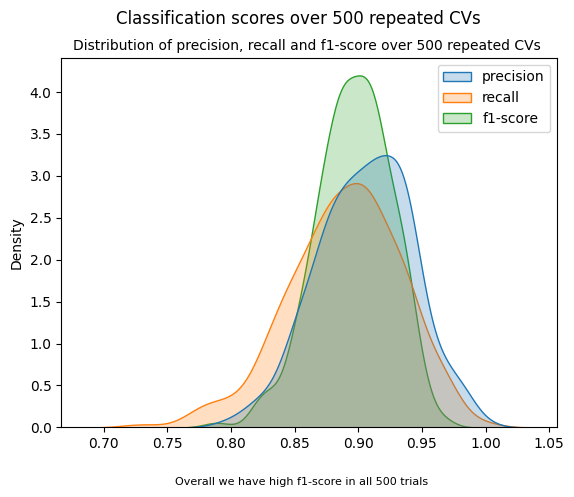

In [84]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees)
_=sns.kdeplot(classwise_classification_scores[["precision", 	"recall", 	"f1-score"]], fill=True)
_=plt.suptitle("ExtraTrees--Classification scores over 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Distribution of precision, recall and f1-score over 500 repeated CVs ", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "Overall we have high f1-score in all 500 trials",
              ha="center",
              fontsize=8)
_=plt.show()

### Repeated StratifiedKFold
But with [catboost encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html) and alse see [here](https://contrib.scikit-learn.org/category_encoders/index.html)

In [51]:
%%time
import category_encoders as ce
clf = ExtraTreesClassifier(criterion = "log_loss",
                           n_estimators=400,
                           max_depth=None,
                           min_samples_split=2,
                           #class_weight = 'balanced',
                           #ccp_alpha = 0.0005
                           )

total_class0 = []
total_class1 = []
total_class2 = []
total_class3 = []
all_roc_auc  = []
total_acc_list = []
count = 1
for i in range(100):
  list_accu_stratified = []
  list_roc_auc = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True,
                        random_state = None
                        )
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]   # y is label encoded
      encoder = ce.CatBoostEncoder(cols=["sex", "edentulous",
                                         "mouth opening", "head and neck movement"]
                                   )
      encoder.fit(X_train, y_train)
      X_train = encoder.transform(X_train)
      X_test = encoder.transform(X_test)
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      acc = clf.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      auc = roc_auc_score(y_test,
                          clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.88
Class-wise AUC: [0.96934473 0.96377841 0.99490489 0.99851962]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
Class-wise AUC: [0.96065028 0.95058847 0.97332048 0.99851962]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.92
Class-wise AUC: [0.96364672 0.96522927 0.99614272 1.        ]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9095477386934674
Class-wise AUC: [0.96515499 0.95679771 0.99450549 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9547738693467337
Class-wise AUC: [0.97726751 0.97292179 0.98691015 1.        ]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test sh

In [52]:
# AUC data compilation (extratrees_catboost_enc)
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
# Class-wise mean of AUCs
print("ExtraTrees-catencoded--Class-wise mean of AUCs:" ,all_roc_auc_array.mean(axis=0).mean(axis=0))

(100, 5, 4)

Class-wise mean of AUCs: [0.96894044 0.96209302 0.97599309 0.98861535]


In [53]:
# Classwise AUCs in 500 iterations (extratrees_catboost_enc)
# Unlist the list
res =  [x for sublist in all_roc_auc for x in sublist]
# Store the resulting output in pandas Dataframe
roc_array['extratrees_catboost_enc'] = res
# 'Explode' the list into class-wise columns
classwise_roc = roc_array['extratrees_catboost_enc'].apply(pd.Series)
# Rename the columns
classwise_roc.columns = ['class1', 'class2', 'class3', 'class4']
classwise_roc.head()

,class1,class2,class3,class4
0,0.969345,0.963778,0.994905,0.99852
1,0.960650,0.950588,0.973320,0.99852
2,0.963647,0.965229,0.996143,1.00000
3,0.965155,0.956798,0.994505,1.00000
4,0.977268,0.972922,0.986910,1.00000


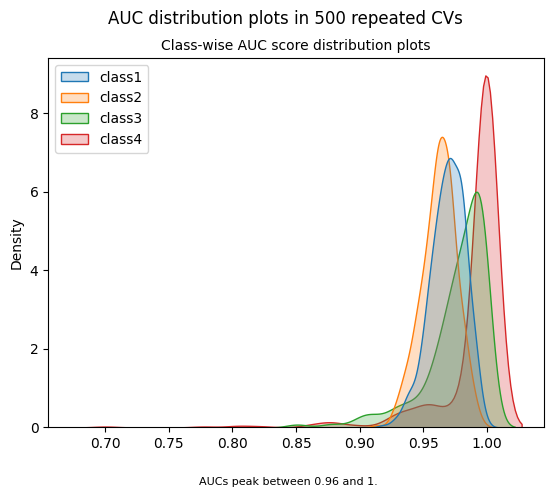

In [54]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees_catboost_enc)
_=sns.kdeplot(classwise_roc, fill=True)
_=plt.suptitle("ExtraTrees-catencoded--AUC distribution plots in 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Class-wise AUC score distribution plots", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "AUCs peak between 0.96 and 1.",
              ha="center",
              fontsize=8)
_=plt.show()

In [55]:
# Mean accuracy scores over CV trials (extratrees_catboost_enc)
print("===ExtraTrees-catencoded--=====")
acc_array['extratrees_catboost_enc'] = np.array(total_acc_list).flatten()
print("Mean Accuracy:", np.mean(acc_array['extratrees_catboost_enc']))
print("Median Accuracy:", np.median(acc_array['extratrees_catboost_enc']))
print("Std deviation of accuracy:", np.std(acc_array['extratrees_catboost_enc']))
print("Class-wise avg AUC scores :", all_roc_auc_array.mean(axis=0).mean(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

Mean Accuracy: 0.9101030150753768
Median Accuracy: 0.91
Std deviation of accuracy: 0.022623969202489443
Class-wise avg AUC scores : [0.96894044 0.96209302 0.97599309 0.98861535]
(for classes 1,2,3,4 respectively)


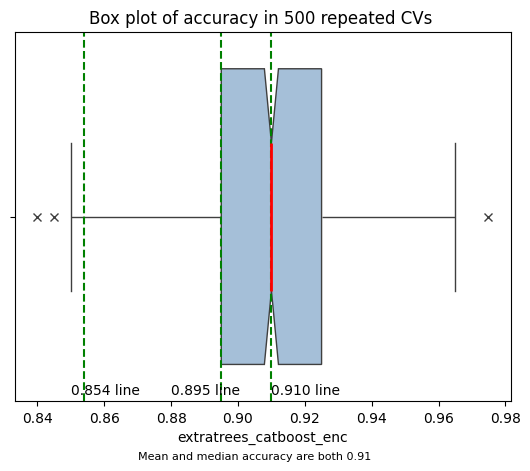

In [56]:
# Accuracy box plot. How accuracy varies over CV trials (extratrees_catboost_enc)
_=plt.title("ExtraTrees-catencoded--Box plot of accuracy in 500 repeated CVs ", ha="center", fontsize=10)
ax=sns.boxplot(
            data=acc_array, x="extratrees_catboost_enc",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )


_=ax.axvline(x=0.854, color='g', linestyle='--')
_=ax.axvline(x=0.91, color='g', linestyle='--')
_=ax.axvline(x=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.88,0.48, "0.895 line")
_=ax.text(0.91,0.48, "0.910 line")
_=ax.text(0.85,0.48, "0.854 line")

_=plt.figtext(0.5, -0.01, "Mean and median accuracy are both 0.91",
              ha="center",
              fontsize=8)
_=plt.show()

In [57]:
# AUC data compilation (extratrees_catboost_enc)
classification_scores = np.array(total_class0)
# Classwise AUCs in 500 iterations
# Unlist the list
res =  [x for sublist in classification_scores for x in sublist]
# Store the resulting output in pandas Dataframe
classification_array=pd.DataFrame()
classification_array['extraTrees_catboost_enc'] = res
# 'Explode' the list into class-wise columns
classwise_classification_scores = classification_array['extraTrees_catboost_enc'].apply(pd.Series)
# Rename the columns
classwise_classification_scores.columns = ['precision', 'recall', 'f1-score', 'support']
classwise_classification_scores.head(2)


,precision,recall,f1-score,support
0,0.910714,0.784615,0.842975,65.0
1,0.878788,0.906250,0.892308,64.0


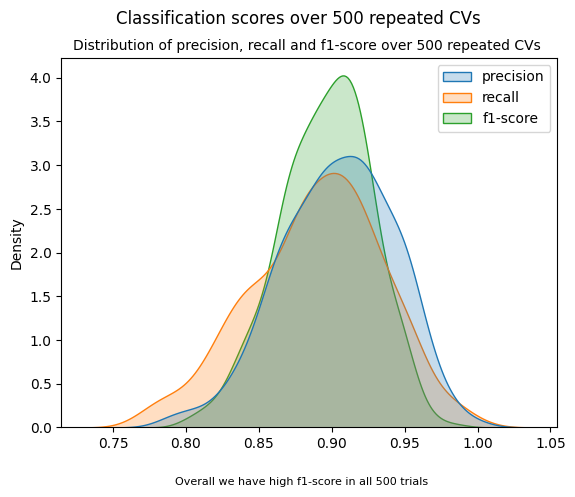

In [58]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees_catboost_enc)
_=sns.kdeplot(classwise_classification_scores[["precision", 	"recall", 	"f1-score"]], fill=True)
_=plt.suptitle("ExtraTrees-catencoded--Classification scores over 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Distribution of precision, recall and f1-score over 500 repeated CVs ", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "Overall we have high f1-score in all 500 trials",
              ha="center",
              fontsize=8)
_=plt.show()

## Comparing two models
 Box plots of accuracy distributions for ExtraTrees vs ExtraTrees-catencoded

In [60]:
# Prepare dataframes for plotting
df_melted = pd.melt(acc_array[
                               ['extratrees',
                               'extratrees_catboost_enc']
                              ],
                     var_name='Feature',
                     value_name='Value'
                     )
df_melted.head(2)
df_melted.tail(2)

,Feature,Value
0,extratrees,0.90
1,extratrees,0.92


,Feature,Value
998,extratrees_catboost_enc,0.914573
999,extratrees_catboost_enc,0.934673


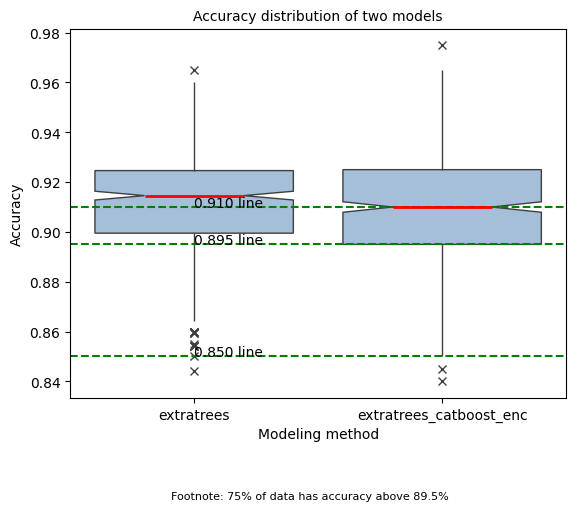

In [61]:
# Create the boxplots
ax=sns.boxplot(
            data=df_melted, x="Feature",
            y = "Value",
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )
_=ax.set(xlabel='Modeling method', ylabel='Accuracy')
_=ax.axhline(y=0.85, color='g', linestyle='--')
_=ax.axhline(y=0.91, color='g', linestyle='--')
_=ax.axhline(y=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.0,0.895, "0.895 line")
_=ax.text(0.0,0.850, "0.850 line")
_=ax.text(0.0,0.910, "0.910 line")
_=plt.title("Accuracy distribution of two models", ha="center", fontsize=10)
_=plt.figtext(0.5, -0.1, "Footnote: 75% of data has accuracy above 89.5%", ha="center", fontsize=8)
plt.show()

### Density plots of accuracy

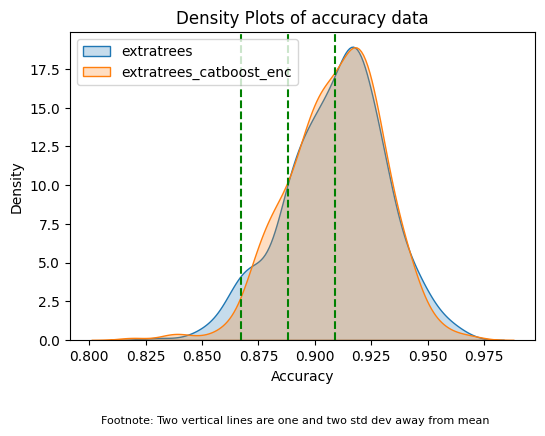

In [ ]:
# Choose the features you want to plot
features = ['extratrees', 'extratrees_catboost_enc']

_=plt.figure(figsize=(6,4))
for feature in features:
    _=sns.kdeplot(acc_array[feature], fill=True, label=feature)

_=plt.title('ExtraTrees vs ExtraTrees-catencoded--Density Plots of accuracy data',fontsize =10 )
_=plt.xlabel('Accuracy')
_=plt.ylabel('Density')
std = np.std(acc_array["extratrees_catboost_enc"])
mean = np.mean(acc_array["extratrees_catboost_enc"])
_=plt.axvline(x= mean - std * 1, color='g', linestyle='--')
_=plt.axvline(x= mean - std * 2, color='g', linestyle='--')
_=plt.axvline(x= mean , color='g', linestyle='--')
_=plt.figtext(0.5, -0.1, "Footnote: Two vertical lines are one and two std dev away from mean",
              ha="center",
              fontsize=8)

_=plt.legend()
_=plt.show()

## Permutation importance
ExtraTrees modeling

In [ ]:
# Splitting the dataset into test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
clf = ExtraTreesClassifier(n_estimators=400,
                           max_depth=None,
                           min_samples_split=2,
                           )
clf.fit(X_train, y_train)

r = permutation_importance(clf, X_test, y_test,
                           n_repeats=40,
                           random_state=0)



ExtraTreesClassifier(n_estimators=400)

In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<13}\t\t\t"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

mallampatti  			0.195 +/- 0.026
sex          			0.105 +/- 0.019
age          			0.094 +/- 0.016
thyromental distance			0.081 +/- 0.013
bmi          			0.073 +/- 0.014
height       			0.069 +/- 0.013
sternomental distance			0.057 +/- 0.013
buck teeth   			0.052 +/- 0.014
head and neck movement			0.049 +/- 0.011
edentulous   			0.046 +/- 0.014
subluxation of mandible			0.025 +/- 0.009


In [ ]:
# REf: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
            )
    tick_labels_dict = {tick_labels_parameter_name: X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

<Axes: >

Text(0.5, 0, 'Gini importance')

<Axes: >

Text(0.5, 0, 'Decrease in accuracy score')

Text(0.5, 0.98, 'Impurity-based vs. permutation importances on multicollinear features (test set)')

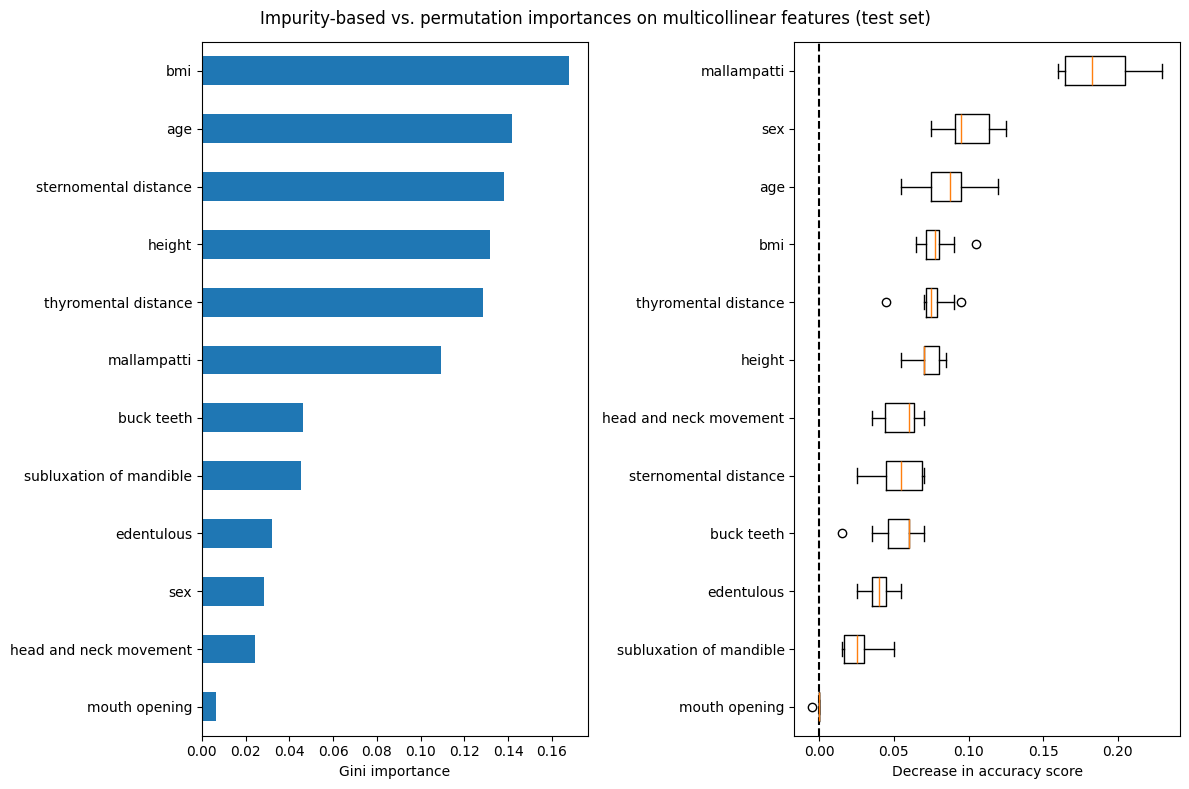

In [ ]:
mdi_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(clf, X_test, y_test, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (test set)"
)
_ = fig.tight_layout()

## XGBoost classifier

In [132]:
%%time
# Search for the best xgboost parameters using Randomized search

from scipy.stats import loguniform


xgb_classifier = XGBClassifier(
                                n_estimators=200,
                                objective='binary:logistic',
                              )

# Consider these parameters:
param_grid = {
              "booster" : ['gbtree', 'dart', 'gblinear'],
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
              "max_depth" : [3,4,5,6,7,8,9],
              "grow_policy" : ['depthwise', 'lossguide'],
              "colsample_bytree" : [0.5,0.7,0.9,1.0],
              "reg_lambda": loguniform(1e-4, 1e-2),
              "reg_alpha" : loguniform(1e-4, 1e-2),
              "gamma" : loguniform(1e-4, 1e-2),
             }

# Evaluate over 100 points in the search space
model_random_search = RandomizedSearchCV(xgb_classifier,
                                       param_distributions=param_grid,
                                       n_jobs=-1,
                                       n_iter = 100,
                                       cv=5
                                       )


model_random_search.fit(X_train, y_train)
xgb_bst_param= model_random_search.best_params_
xgb_bst_param


CPU times: user 17.9 s, sys: 2.3 s, total: 20.2 s
Wall time: 36min 56s


{'booster': 'gbtree',
 'colsample_bytree': 1.0,
 'gamma': np.float64(0.00026504283871027745),
 'grow_policy': 'depthwise',
 'learning_rate': 0.2,
 'max_depth': 9,
 'reg_alpha': np.float64(0.00013752546442467043),
 'reg_lambda': np.float64(0.0007881398282970199)}

In [138]:
# Best fitted model's performance:
model_random_search.score(X_test,y_test)  # 0.8592964824120602

0.8592964824120602

In [140]:
%%time
# The accuracy with the best parameters:

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

xgb_clf = XGBClassifier(booster = xgb_bst_param['booster'],
                        max_depth = xgb_bst_param['max_depth'],
                        n_estimators=200,
                        grow_policy = xgb_bst_param['grow_policy'],
                        colsample_bytree = xgb_bst_param['colsample_bytree'],
                        reg_lambda = xgb_bst_param['reg_lambda'],
                        reg_alpha = xgb_bst_param['reg_alpha'],
                        gamma =xgb_bst_param['gamma'],
                        learning_rate= xgb_bst_param['learning_rate'],
                        objective='binary:logistic',
                        )


start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    xgb_clf.fit(X_train, y_train)
    print("Accuracy:", xgb_clf.score(X_test, y_test))
    list_accu_stratified.append(xgb_clf.score(X_test, y_test))
    auc = roc_auc_score(y_test,
                          xgb_clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
    print("Class-wise AUC:", auc)

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.88
Class-wise AUC: [0.95703704 0.94876218 0.95278533 0.99407846]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.89
Class-wise AUC: [0.96392463 0.96043019 0.98778528 0.97779423]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.88
Class-wise AUC: [0.93994302 0.93400142 0.8932819  0.98815692]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8844221105527639
Class-wise AUC: [0.92583238 0.93079443 0.97349709 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8592964824120602
Class-wise AUC: [0.92571757 0.92506143 0.88849386 0.99395509]
Overall Accuracy: 0.8787437185929647
CPU times: user 3.18 s, sys: 86.8 ms, total: 3.27 

## Voting classifier

In [162]:
%%time

from sklearn.ensemble import  VotingClassifier



xgb_clf = XGBClassifier(booster = xgb_bst_param['booster'],
                        max_depth = xgb_bst_param['max_depth'],
                        n_estimators=200,
                        grow_policy = xgb_bst_param['grow_policy'],
                        colsample_bytree = xgb_bst_param['colsample_bytree'],
                        reg_lambda = xgb_bst_param['reg_lambda'],
                        reg_alpha = xgb_bst_param['reg_alpha'],
                        gamma =xgb_bst_param['gamma'],
                        learning_rate= xgb_bst_param['learning_rate'],
                        objective='binary:logistic',
                        #enable_categorical = True
                        )

extra_clf = ExtraTreesClassifier(n_estimators=150,
                           max_depth=None,
                           min_samples_split=2,
                           )

hist_classifier  = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )

#rf_classifier = RandomForestClassifier(n_estimators=400)


eclf = VotingClassifier(estimators=[
                                    ('hist', hist_classifier),
                                    ('extra', extra_clf),
                                    #('rf', rf_classifier)
                                    ],
                         voting='soft')



total_acc_list = []
total_class0  = []
total_class1 = []
total_class2 = []
total_class3 = []
count = 1
for i in range(50):
  print("=========")
  print("ITERATION", i)
  print("=========")

  list_accu_stratified = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      eclf.fit(X_train, y_train)
      print("Accuracy:", eclf.score(X_test, y_test))
      list_accu_stratified.append(eclf.score(X_test, y_test))
      sk = classification_report(y_test, eclf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)



ITERATION 0
fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.89
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.875
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.914572864321608
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9246231155778895
ITERATION 1
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.91
fold: 7
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.875
fold: 8
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.86
fold: 9
X_train shape: (799,

In [164]:
print("========")
acc_array = np.array(total_acc_list)
acc_array.shape  # (50,5)
print("Overall Accuracy:", np.mean(acc_array))
print("Median Accuracy:", np.median(acc_array))
print("Std deviation of accuracy:", np.std(acc_array))
print("========")

(50, 5)

Overall Accuracy: 0.895751055276382
Median Accuracy: 0.895
Std deviation of accuracy: 0.023006834126292453


<Axes: xlabel='accuracy'>

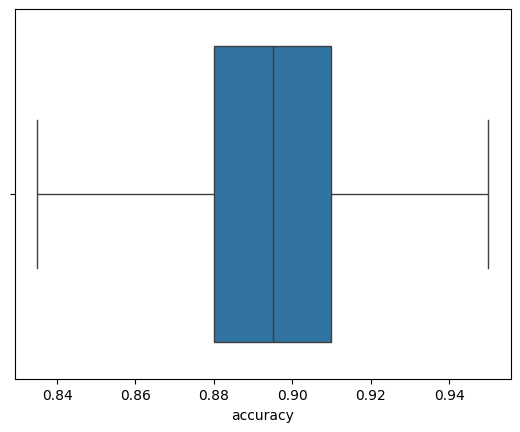

In [165]:
acc = pd.DataFrame(acc_array.flatten(), columns = ["accuracy"])
sns.boxplot(data=acc, x="accuracy")


<Axes: xlabel='accuracy', ylabel='Density'>

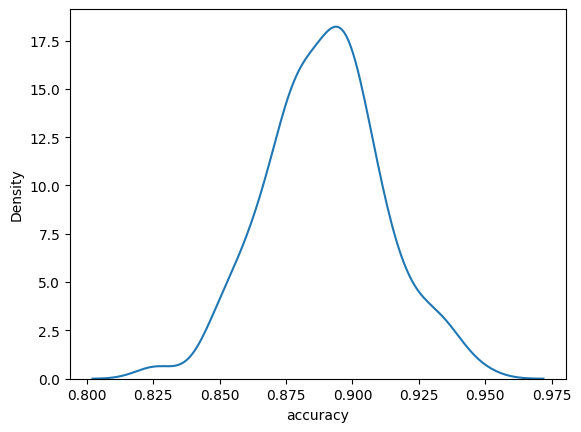

In [ ]:
sns.kdeplot(data=acc, x="accuracy")

In [ ]:
###########

In [ ]:
%%time

from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

#y = y.astype('int64')

xgb_clf = XGBClassifier(tree_method="hist",
                        n_estimators=200,
                        max_depth=7,
                        learning_rate=0.1,
                        objective='binary:logistic',
                        #enable_categorical = True
                        )

extra_clf = ExtraTreesClassifier(criterion = 'entropy',n_estimators=150,
                           max_depth=None,
                           min_samples_split=2,
                           )

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  bst_param['max_leaf_nodes'],
                                                 l2_regularization = bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = bst_param['learning_rate'],
                                                 max_features = bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )

rf_classifier = RandomForestClassifier(n_estimators=300)

extra_clf1 = ExtraTreesClassifier(n_estimators=350,
                                  max_depth=None,
                                  min_samples_split=2,

                                  )


sclf = StackingClassifier(estimators=[('xgb', xgb_clf),
                                      ('hist', hist_classifier),
                                       ('extra', extra_clf)],
                         final_estimator= extra_clf1,
                         n_jobs = -1,
                         passthrough = True,
                         cv = 5,
                         stack_method = 'predict_proba')

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
sclf.fit(X_train, y_train)

print(classification_report(y_test,
                      sclf.predict(X_test),
                      output_dict = True
                      ))

print("Accuracy:", sclf.score(X_test, y_test))


{'0': {'precision': 0.8470588235294118, 'recall': 0.935064935064935, 'f1-score': 0.8888888888888888, 'support': 77.0}, '1': {'precision': 0.8951048951048951, 'recall': 0.9142857142857143, 'f1-score': 0.9045936395759717, 'support': 140.0}, '2': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 24.0}, '3': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 9.0}, 'accuracy': 0.888, 'macro avg': {'precision': 0.9355409296585767, 'recall': 0.7956709956709956, 'f1-score': 0.8483706321162152, 'support': 250.0}, 'weighted avg': {'precision': 0.8941528589058, 'recall': 0.888, 'f1-score': 0.8859502159403219, 'support': 250.0}}
Accuracy: 0.888
CPU times: user 1.49 s, sys: 42.5 ms, total: 1.54 s
Wall time: 25.3 s


In [ ]:

%%time

#y= pd.DataFrame(y, columns = ['cormack lahane'])
#y.head()

# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time


#skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


clf = XGBClassifier(tree_method="hist",
                    n_estimators=200,
                    max_depth=7,
                    learning_rate=0.1,
                    objective='binary:logistic',
                    enable_categorical = True)

total_acc_list = []
total_class0  = []
total_class1 = []
total_class2 = []
total_class3 = []
count = 1
for i in range(3):
  list_accu_stratified = []
  class0  = []
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      print("Accuracy:", clf.score(X_test, y_test))
      list_accu_stratified.append(clf.score(X_test, y_test))
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))   # ['precision', 'recall', 'f1-score', 'support']
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))


  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)





In [ ]:
###############